# Import packages

In [4]:
import pandas as pd
import numpy as np

# Built-in Statistical Method in DataFrame

In [5]:
df = pd.DataFrame(data=[54, 42, 39, 76, 21, 96, 8, 22, 29, 3, 72], columns=['X'])

df

,X
0,54
1,42
2,39
3,76
4,21
5,96
6,8
7,22
8,29
9,3


## Simple Functions

In [8]:
df.count()
df.min()
df.max()
df.sum()
df.mean()
df.median()
df.std()
df.describe()

,X
count,11.000000
mean,42.000000
std,29.685013
min,3.000000
25%,21.500000
50%,39.000000
75%,63.000000
max,96.000000


## Accumulators

In [7]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10
X,54,42,39,76,21,96,8,22,29,3,72


In [9]:
df.cumsum()
df.cummin()
df.cummax()
df.cumprod()

,X
0,54
1,2268
2,88452
3,6722352
4,141169392
5,13552261632
6,108418093056
7,2385198047232
8,69170743369728
9,207512230109184


## General Purpose Functions

In [10]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10
X,54,42,39,76,21,96,8,22,29,3,72


In [11]:
df.diff()
df.pct_change()
df.idxmax()
df.idxmin()
df.skew()
df.kurt()
df.quantile(q=[.25, .5, .75])
df.quantile(q=[.9, .95, .99])

,X
0.90,76.0
0.95,86.0
0.99,94.0


In [12]:
import yfinance as yf

df_META = yf.download(tickers='META', start='2000-01-01')
df_AMZN = yf.download(tickers='AMZN', start='2000-01-01')
df_AAPL = yf.download(tickers='AAPL', start='2000-01-01')
df_AAPL.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853356,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


# Apply

In [13]:
def foo(x):
    res = 0
    
    if np.cos(x) > 0:
        res = np.cos(x)
        
    return res


foo(0.9)

0.6216099682706644

In [14]:
def foo(x):
    return np.cos(x) if np.cos(x) > 0 else 0

df_AAPL['Volume'].apply(lambda x : foo(x))

Date
2000-01-03    0.231492
2000-01-04    0.122602
2000-01-05    0.960631
2000-01-06    0.000000
2000-01-07    0.233576
                ...   
2022-08-02    0.449471
2022-08-03    0.000000
2022-08-04    0.134217
2022-08-05    0.000000
2022-08-08    0.000000
Name: Volume, Length: 5686, dtype: float64

# Common FO Calculations

<AxesSubplot:xlabel='Date'>

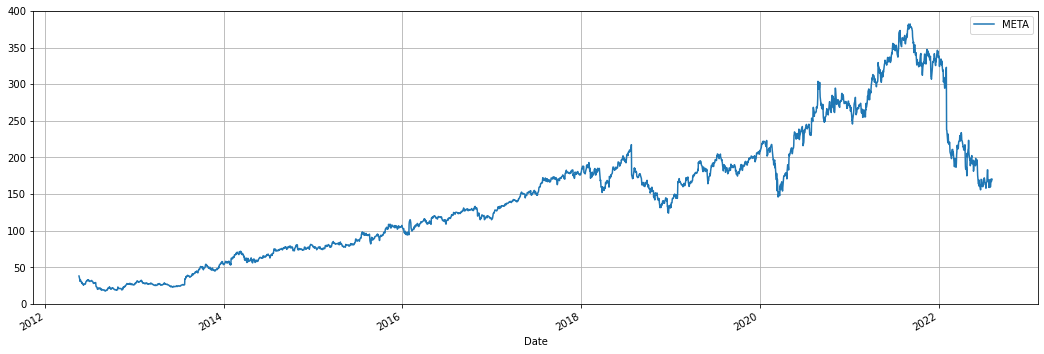

In [15]:
df = pd.DataFrame()

df['META'] = df_META['Adj Close']

df.plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

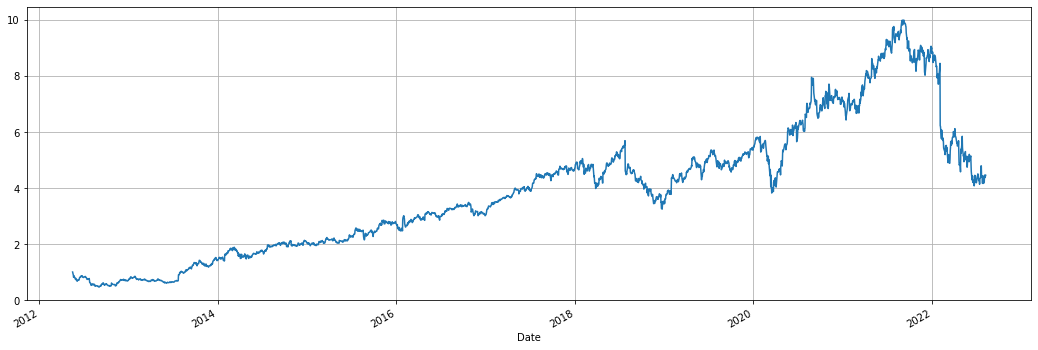

In [16]:
df.iloc[0,0]
df['Normed'] = df['META'] / df.iloc[0,0]

df['Normed'].plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

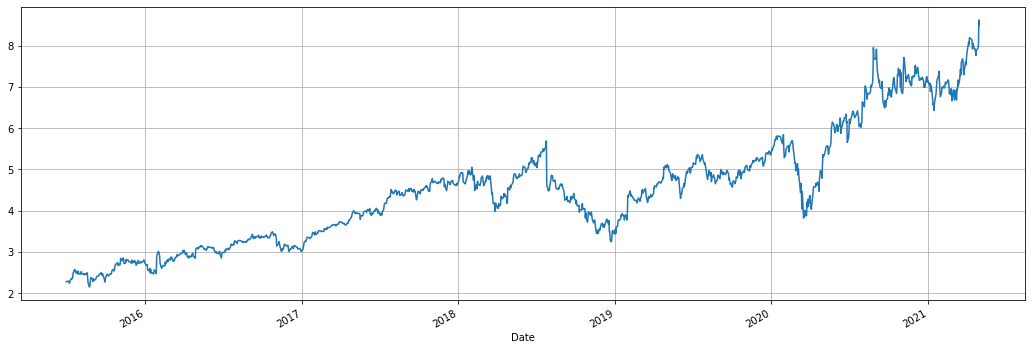

In [17]:
df.loc['2015-JUL':'2021-APR']['Normed'].plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

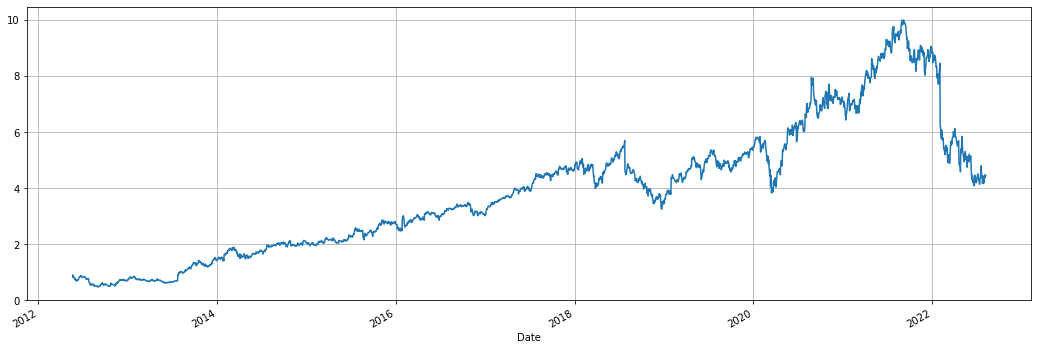

In [18]:
df['Return'] = df['META'] / df['META'].shift(1)

df['Return'].cumprod().plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

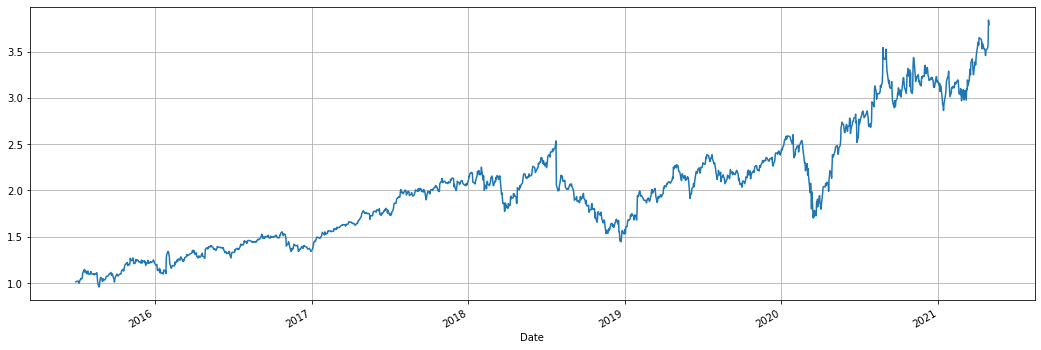

In [19]:
df.loc['2015-JUL':'2021-APR']['Return'].cumprod().plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

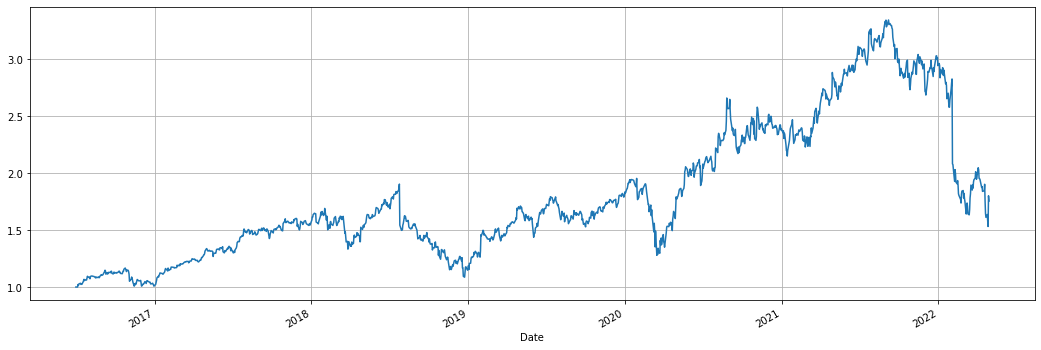

In [20]:
df['Log Return'] = np.log(df['META'] / df['META'].shift(1))

df.loc['2016-JUL':'2022-APR']['Log Return'].cumsum().apply(np.exp).plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

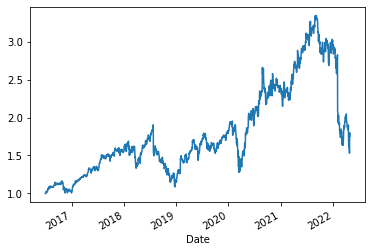

In [21]:
df.loc['2016-JUL':'2022-APR']['Log Return'].cumsum().apply(np.exp).plot()

<AxesSubplot:xlabel='Date'>

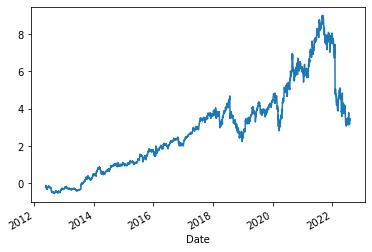

In [22]:
(df['Return'].cumprod() - 1).plot()

# Correlation

In [23]:
df_CORR = pd.DataFrame()

df_CORR['META'] = df_META['Adj Close'].pct_change()
df_CORR['AMZN'] = df_AMZN['Adj Close'].pct_change()
df_CORR['AAPL'] = df_AAPL['Adj Close'].pct_change()

df_CORR.head()

,META,AMZN,AAPL
Date,,,
2012-05-18,NaN,-0.020654,0.000490
2012-05-21,-0.109861,0.019921,0.058260
2012-05-22,-0.089039,-0.012746,-0.007679
2012-05-23,0.032258,0.009056,0.024400
2012-05-24,0.032187,-0.009389,-0.009184


In [24]:
df_CORR.corr()

,META,AMZN,AAPL
META,1.000000,0.48353,0.423506
AMZN,0.483530,1.00000,0.486020
AAPL,0.423506,0.48602,1.000000


In [25]:
df_CORR.loc['2016'].corr()

,META,AMZN,AAPL
META,1.000000,0.589049,0.354873
AMZN,0.589049,1.000000,0.353296
AAPL,0.354873,0.353296,1.000000


In [26]:
df_CORR.loc['2016'].corr(method='spearman')

,META,AMZN,AAPL
META,1.000000,0.600904,0.380684
AMZN,0.600904,1.000000,0.406167
AAPL,0.380684,0.406167,1.000000


array([[<AxesSubplot:xlabel='META', ylabel='META'>,
        <AxesSubplot:xlabel='AMZN', ylabel='META'>,
        <AxesSubplot:xlabel='AAPL', ylabel='META'>],
       [<AxesSubplot:xlabel='META', ylabel='AMZN'>,
        <AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='AAPL', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='META', ylabel='AAPL'>,
        <AxesSubplot:xlabel='AMZN', ylabel='AAPL'>,
        <AxesSubplot:xlabel='AAPL', ylabel='AAPL'>]], dtype=object)

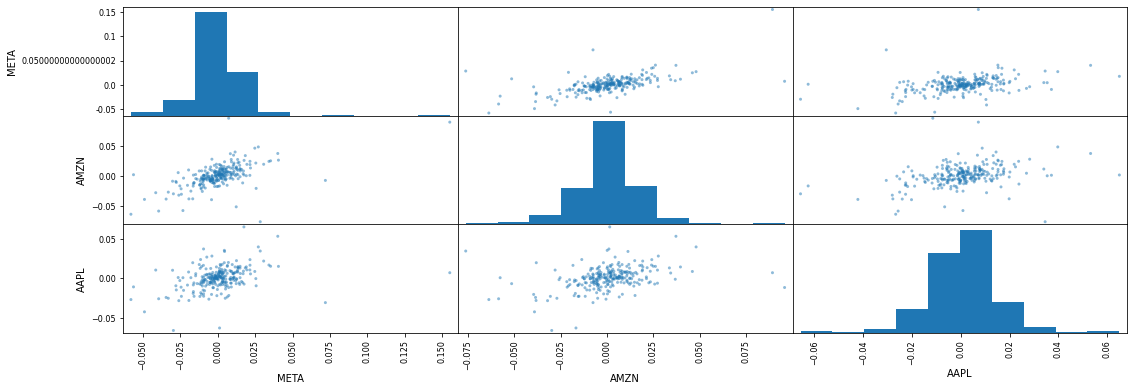

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_CORR.loc['2016'], figsize=(18,6))

<AxesSubplot:xlabel='Date'>

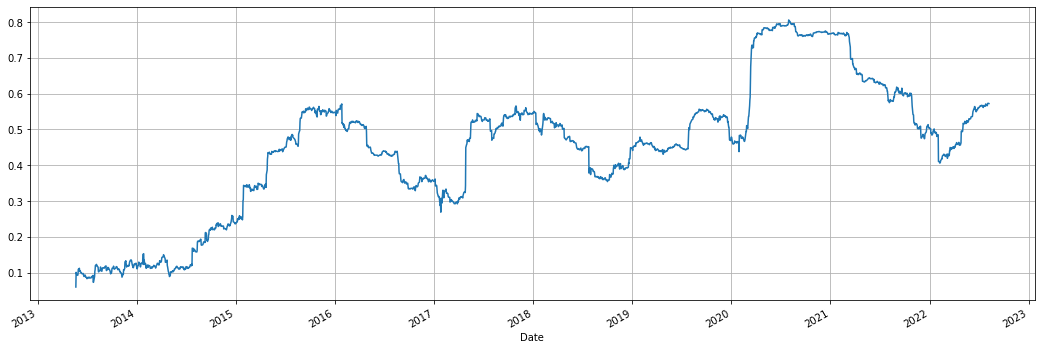

In [28]:
df_CORR['META'].rolling(window=252).corr(df_CORR['AAPL']).plot(grid=True, figsize=(18,6))

<AxesSubplot:xlabel='Date'>

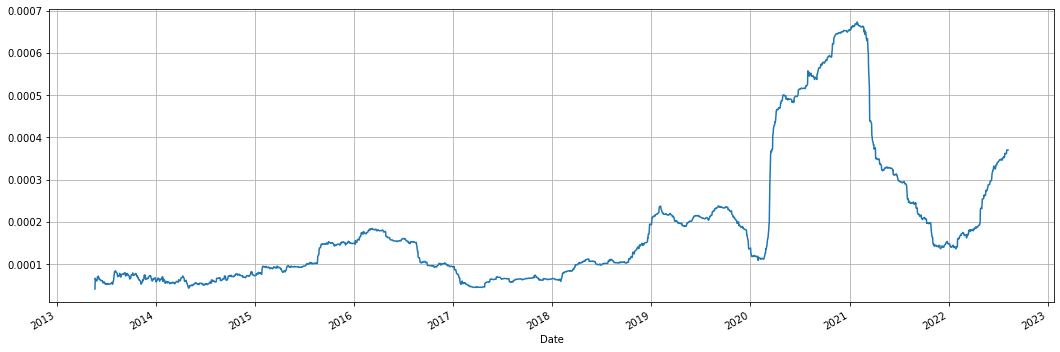

In [29]:
df_CORR['META'].rolling(window=252).cov(df_CORR['AAPL']).plot(grid=True, figsize=(18,6))

# Measuring Performance


$ f(x) = 3 log(x) + cos(x)^2 $

## Use Pure Python

In [30]:
from math import log, cos

loops = 2500000
a = range(1,loops)

def f(x):
    return 3 * log(x) + cos(x)**2

%timeit r = [ f(x) for x in a]

1.7 s ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Use Numpy

In [31]:
import numpy as np

loops = 2500000
a = range(1,loops)

%timeit r = 3 * np.log(a) + np.cos(a)**2

557 ms ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## NumExpr

In [32]:
import numexpr as ne
ne.set_num_threads(1)

loops = 2500000
a = range(1,loops)

f = '3 * log(a) + cos(a)**2'

%timeit r = ne.evaluate(f)

275 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Use numpy correctly

In [35]:
import numpy as np

loops = 2500000
a = np.array(range(1,loops))

%timeit r = 3 * np.log(a) + np.cos(a)**2

83.2 ms ± 8.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
